**人体运动状态识别项目研究**

In [97]:
import os
root_dir="F:/机器学习数据集/data and code/data/"
meta=[]
for filename in os.listdir(root_dir):#展开成一个新的列表
    meta.append(filename)

data=[]
label=[]
for i in range(len(meta)):
    with open(root_dir+meta[i]) as f:
        lines=f.readlines()
        for line in lines:
            data1=line.split()
            data.append(data1[1:-2])
            label.append(data1[-1:-3:-1])

In [9]:
import matplotlib.pyplot as plt
def plot_3D(X,y,elev=20,azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],X[:,2],c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
from ipywidgets import interact,fixed
interact(plot_3D,elec=[0,30,60,90,120],azim=(-180,180),X=fixed(df.values[:144899:20,:]),y=fixed(df.values[:144899:20,-2]))
#plot_3D()
plt.show()
#fixed是什么

interactive(children=(IntSlider(value=20, description='elev', max=60, min=-20), IntSlider(value=30, descriptio…

(144899, 11)

In [99]:
df.head(4)

,加速计x轴,加速计y轴,加速计z轴,陀螺仪x轴,陀螺仪y轴,陀螺仪z轴,气压计,光线传感器,距离传感器,位置,状态
时间戳,,,,,,,,,,,
6406.0,3.521871,9.691729,0.818817,-0.520326,-3.178681,-0.443968,996.31,0.0,0.0,1,1
6426.0,3.751714,8.906430,1.929727,-0.074176,-2.673626,-0.454876,996.31,0.0,0.0,1,1
6446.0,4.695030,7.541735,-0.507571,0.709040,-2.634356,-0.666498,996.31,0.0,0.0,1,1
6465.0,6.299145,6.138733,-5.592855,1.030835,-1.569705,-1.157371,996.31,0.0,0.0,1,1


In [45]:
"""每一行数据：  时间戳	加速计x轴  加速计y轴  加速计z轴  陀螺仪x轴  陀螺仪y轴  陀螺仪z轴  气压计  光线传感器  距离传感器  位置  状态


位置：1-背包  2-裤子口袋  3-平端  4-手握
状态：1- 爬楼梯  2-静止  3-平地走路  4-扶梯  5-直梯"""
df.iloc[:10,0:3]
#上面这个是按数字索引
#df.describe()
df.loc[6426.0,"加速计y轴"]
#上面为按照index和columns索引

8.90643

In [83]:
df.describe()

,加速计x轴,加速计y轴,加速计z轴,陀螺仪x轴,陀螺仪y轴,陀螺仪z轴,气压计,光线传感器,距离传感器,位置,状态
count,144899.000000,144899.000000,144899.000000,144899.000000,144899.000000,144899.000000,144899.000000,144899.000000,144899.000000,144899.000000,144899.000000
mean,0.705575,-4.396440,1.976539,0.035141,0.033269,-0.018943,973.737294,242.069279,1.654150,2.466539,2.976549
std,5.625576,5.156150,5.296185,0.552074,0.500364,0.664483,10.359641,785.008724,2.352675,1.158469,1.453015
min,-16.189590,-61.447420,-38.130054,-3.941086,-7.868163,-4.026627,964.675540,0.000000,0.000000,1.000000,1.000000
25%,-4.429276,-8.606201,-1.456406,-0.030151,-0.037088,-0.045815,966.070000,0.000000,0.000000,1.000000,2.000000
50%,0.246603,-5.468357,0.239420,0.002350,0.002258,-0.000977,969.227050,3.205444,0.000000,2.000000,3.000000
75%,5.221754,0.581558,5.881836,0.091630,0.068298,0.038025,975.029970,26.074417,5.000305,4.000000,4.000000
max,36.978447,12.856628,28.876938,8.172504,5.877396,4.360051,996.480000,4237.255400,5.000305,4.000000,5.000000


In [5]:
df.values[1,1]

8.90643

In [1]:
import numpy as np
import pandas as pd
import os


root_dir="F:/机器学习数据集/data and code/data/"
meta=[]
for filename in os.listdir(root_dir):#展开成一个新的列表
    meta.append(filename)
df=pd.DataFrame([])
#读取txt 
for i in range(1):
    df_news = pd.read_table(root_dir+meta[0],sep='\s+')
    dfi=pd.DataFrame(df_news)
    
#指定某一列为索引
    dfi.columns = ["时间戳","加速计x轴","加速计y轴",  "加速计z轴",  "陀螺仪x轴"," 陀螺仪y轴", "陀螺仪z轴", "气压计","光线传感器", "距离传感器","位置", "状态"]
    dfi.set_index('时间戳',inplace=True)
    df=df.append(dfi)
    
    
df_test=pd.DataFrame([])
#读取txt 
for i in range(len(meta)-1,len(meta)):
    df_news = pd.read_table(root_dir+meta[0],sep='\s+')
    dfi=pd.DataFrame(df_news)
    
#指定某一列为索引
    dfi.columns = ["时间戳","加速计x轴","加速计y轴",  "加速计z轴",  "陀螺仪x轴"," 陀螺仪y轴", "陀螺仪z轴", "气压计","光线传感器", "距离传感器","位置", "状态"]
    dfi.set_index('时间戳',inplace=True)
    df_test=df_test.append(dfi)
#df
# 初始化引擎
#connect = create_engine('postgresql+psycopg2://'+'yonghu'+':'+'mima'+'@ip'+':'+str(duankou) + '/' + 'kuming')
# 写入数据 
#pd.io.sql.to_sql(df,'test0001',connect,schema='ioc_dw_second', if_exists='append')
#connect.dispose()

In [8]:
df.values[df.values[:,-1]==2].shape

(26000, 11)

In [52]:
import numpy as np
X=[]
Y=[]
for i in range(len(df.values[0:34923,:]) ):
    #if i%30==0:
    X.append(data[i])
    Y.append(label[i])
X=np.array(X).astype(np.float32)
Y=np.array(Y).astype(np.int16)

### 数据去噪处理

In [ ]:
df_test


###  绘制图像

In [662]:
import matplotlib.pyplot as plt
def splot(X):
    plt.figure(figsize=(10,8),dpi=100)
    for i in range(np.shape(X)[1]):
        plt.plot(range(np.shape(X)[0]),X[:,i])
    plt.show()

### 减去重力加速度

In [10]:
input1=df.values[df.values[:,-1]==2]

In [11]:
input1.shape

(26000, 11)

In [31]:
import torch

Input=torch.tensor(input1[:,0:3],dtype=torch.float32)
Nsample=Input.shape[0]
y=torch.tensor(9.8*np.ones(Nsample),dtype=torch.float32)
epoch=10000
D_in,D_out = 3, 3
model = torch.nn.Sequential(
 torch.nn.Linear(D_in, D_out),
 #torch.nn.ReLU()
)
model.load_state_dict(torch.load("./8.4_model_pre.pt"))
learning_rate=3e-5
for i in range(epoch):
    Output = model(Input)
    y_hat = torch.sum(Output**2,axis=1)
    #loss_fn = torch.nn.MSELoss(reduction='mean')
    #loss=loss_fn(y,y_hat)
    loss=torch.sum((y_hat-y**2)**2)/Nsample
    #if loss < 3.3:
    #    torch.save(model.state_dict(), "./8.4_model.pt")
    #if i>60000:
     #   learning_rate=5e-6
    if i%3000==0:
        #print(Output.shape)
        print("当前的损失是%f"%loss)
    model.zero_grad()
    loss.backward()
    #if(i>200):
    #    learning_rate=100/i*1e-6
    with torch.no_grad():
        for params in model.parameters():
            params-=params.grad*learning_rate


当前的损失是0.106676


KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LinearRegression as LR 
reg = LR().fit(xtrain,ytrain)
yhat = reg.predict(xtest)

In [29]:
torch.save(model.state_dict(), "./8.4_model_pre.pt")

In [30]:
for params in model.parameters():
    print(params)

Parameter containing:
tensor([[ 0.2442, -0.0688, -0.0266],
        [-0.2049, -0.1495, -0.0412],
        [-0.0319,  0.2027,  0.1848]], requires_grad=True)
Parameter containing:
tensor([5.5088, 5.7381, 4.4477], requires_grad=True)


In [206]:
W=np.array([[-0.2124, -0.6291,  0.4833],
        [-0.6860, -0.2468, -0.6499],
        [ 0.2897, -0.0503, -0.1903]])
b=np.array([ 0.0016, -0.4460, -0.2228])

In [32]:
###数据校正阶段
#Accelerate=np.dot(df.values[:,0:3],W)+b
Accelerate=model(torch.tensor(input1[:,0:3],dtype=torch.float)).detach().numpy()

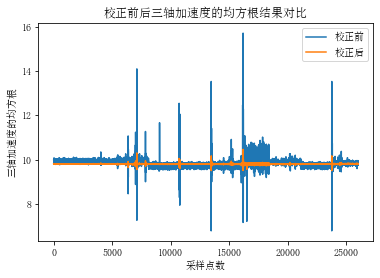

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun']
M=0
#N=df.values.shape[0]//10
temp=df.values[df.values[:,-1]==2]
N=temp.shape[0]
plt.plot(range(M,N),np.sqrt(temp[M:N,0]**2+temp[M:N,1]**2+temp[M:N,2]**2),label='校正前')
temp=Accelerate
plt.plot(range(M,N),np.sqrt(temp[M:N,0]**2+temp[M:N,1]**2+temp[M:N,2]**2),label='校正后')
plt.title("校正前后三轴加速度的均方根结果对比")
plt.xlabel('采样点数')
plt.ylabel("三轴加速度的均方根")
plt.legend(loc='best',fontsize=10)

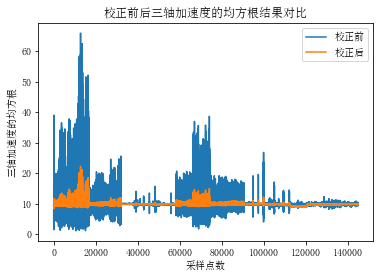

In [64]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun']
Accelerate=model(torch.tensor(df.values[:,0:3],dtype=torch.float)).detach().numpy()
M=0
#N=df.values.shape[0]//10
temp=df.values
N=temp.shape[0]
plt.plot(range(M,N),np.sqrt(temp[M:N,0]**2+temp[M:N,1]**2+temp[M:N,2]**2),label='校正前')
temp=Accelerate
plt.plot(range(M,N),np.sqrt(temp[M:N,0]**2+temp[M:N,1]**2+temp[M:N,2]**2),label='校正后')
plt.title("校正前后三轴加速度的均方根结果对比")
plt.xlabel('采样点数')
plt.ylabel("三轴加速度的均方根")
plt.legend(loc='best',fontsize=10)

E:\anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


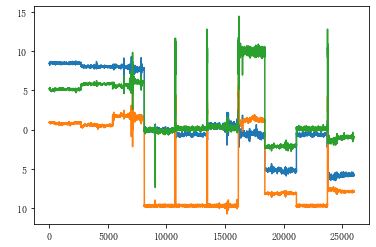

In [67]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun']
Accelerate=model(torch.tensor(df.values[:,0:3],dtype=torch.float)).detach().numpy()
M=0
#N=df.values.shape[0]//10
temp=df.values[df.values[:,-1]==2]
N=temp.shape[0]
plt.plot(range(M,N),temp[M:N,0],label='校正前')
plt.plot(range(M,N),temp[M:N,1],label='校正后')
plt.plot(range(M,N),temp[M:N,2],label='校正后')

In [72]:
def Filter(X):
    g=np.zeros([X.shape[0],X.shape[1]])
    varible=X#df.values[:,0:3]
    alpha=0.9
    for i in range(X.shape[0]):
        if i==0:
            g[i,:]=X[i,:]
        else:
            g[i,:]=alpha*g[i-1,:]+(1-alpha)*X[i,:]
    return g

In [10]:
Acc_test=df.values
#Acc_test[:,0:3]=model(torch.tensor(Acc_test[:,0:3],dtype=torch.float)).detach().numpy()
#Acc_test[df.values[:,-1]==2][:,0:3]=Accelerate

In [436]:
Acc_dn=Denosie(Acc_test[:,0:6])
#Accelerate_behind=Filter(Acc_dn)
#Noise_out=np.array(Denosie(result)).T

In [80]:
result=Acc_dn-Accelerate_behind

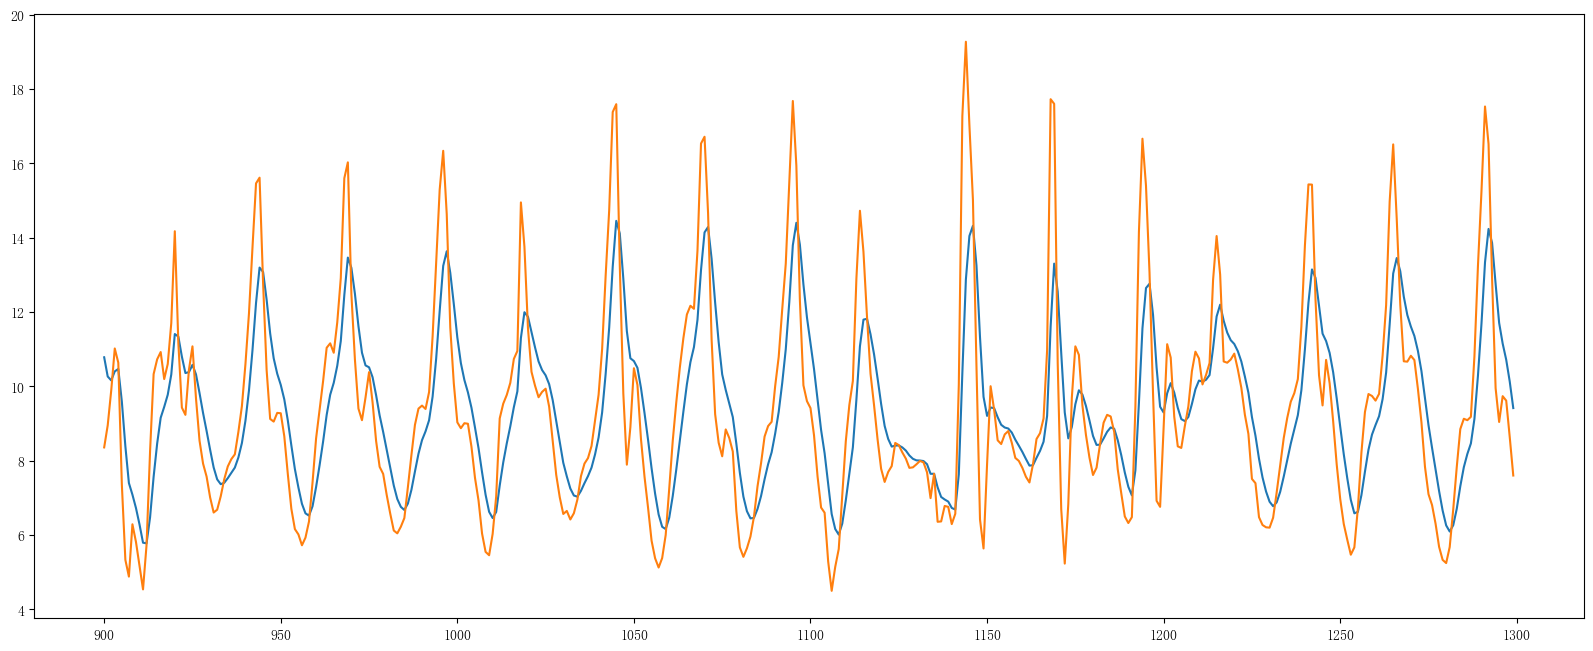

In [437]:
plt.figure(figsize=(20,8),dpi=100)
#plt.plot(df.values.shape[0],df.values[:,0：3])
#splot(df.values[:1000,0:3])
from pylab import mpl
# 设置显示中文字体
plt.rcParams['font.sans-serif'] = ['SimSun']
M=900
N=1300
temp=Acc_dn
plt.plot(range(M,N),temp[M:N,0],label='校正后')
temp=Acc_test#df.values[:,0:3]
plt.plot(range(M,N),temp[M:N,0],label='消除重力加速度影响')
#temp=Accelerate_behind#df.values[:,0:3]
#plt.plot(range(M,N),np.sqrt(temp[M:N,0]**2+temp[M:N,1]**2+temp[M:N,2]**2),label='原始加速度')
#plt.legend(loc="best",fontsize=10)"""
#for i in range(6):
#plt.plot(range(M,N),np.sqrt(temp[M:N,i]),label='校正后')

E:\anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


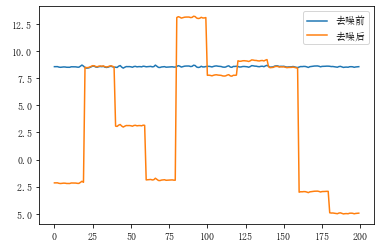

In [651]:
M=0
input1
N=200
temp=Accelerate
plt.plot(range(M,N),temp[M:N,0],label='去噪前')
temp=acc_x_fliter.reshape(-1,1)
plt.plot(range(M,N),temp[M:N,0],label='去噪后')
plt.legend(loc="best",fontsize=10)

In [648]:
acc_x=Accelerate[:1000,0]
acc_matrix=acc_x.reshape(-1,20)
Mean=np.mean(acc_matrix,axis=1).reshape(-1,1)
acc_matrixc=acc_matrix-np.mean(acc_matrix,axis=1).reshape(-1,1)
S,V,D=np.linalg.svd (np.dot(acc_matrixc,acc_matrixc.T))

In [649]:
acc_x_fliter=np.dot(np.dot(S[:,:20],S[:,:20].T),acc_matrix)

In [435]:
import numpy as np
import matplotlib.pyplot as plt

# Q为这一轮的心里的预估误差
Q = 0.00001
# R为下一轮的测量误差
R = 0.00003

# Accumulated_Error为上一轮的估计误差，具体呈现为所有误差的累计
Accumulated_Error = 1
# 初始旧值
kalman_adc_old = 0

SCOPE = 50

def kalman(ADC_Value):
    global kalman_adc_old
    global Accumulated_Error

    # 新的值相比旧的值差太大时进行跟踪
    if (abs(ADC_Value-kalman_adc_old)/SCOPE > 0.25):
        Old_Input = ADC_Value*0.382 + kalman_adc_old*0.618
    else:
        Old_Input = kalman_adc_old

    # 上一轮的 总误差=累计误差^2+预估误差^2
    Old_Error_All = (Accumulated_Error**2 + Q**2)**(1/2)

    # R为这一轮的预估误差
    # H为利用均方差计算出来的双方的相信度
    H = Old_Error_All**2/(Old_Error_All**2 + R**2)

    # 旧值 + 1.00001/(1.00001+0.1) * (新值-旧值)
    kalman_adc = Old_Input + H * (ADC_Value - Old_Input)

    # 计算新的累计误差
    Accumulated_Error = ((1 - H)*Old_Error_All**2)**(1/2)
    # 新值变为旧值
    kalman_adc_old = kalman_adc
    return kalman_adc

 
#array = np.array([50]*200)

#s = np.random.normal(0, 5, 200)
def Denosie(array):
    result=[]
    
    for i in range(array.shape[1]):
        result.append(denoiseline(array[:,i]))
    return np.array(result).T
    
def denoiseline(test_array):
    adc=[]
    for i in range(test_array.shape[0]):
        adc.append(kalman(test_array[i]))
    return adc

#Noise_out=np.array(Denosie(Acc_test))

In [441]:
result=Acc_test

Text(0.5, 1.0, '卡夫曼滤波前后数据对比')

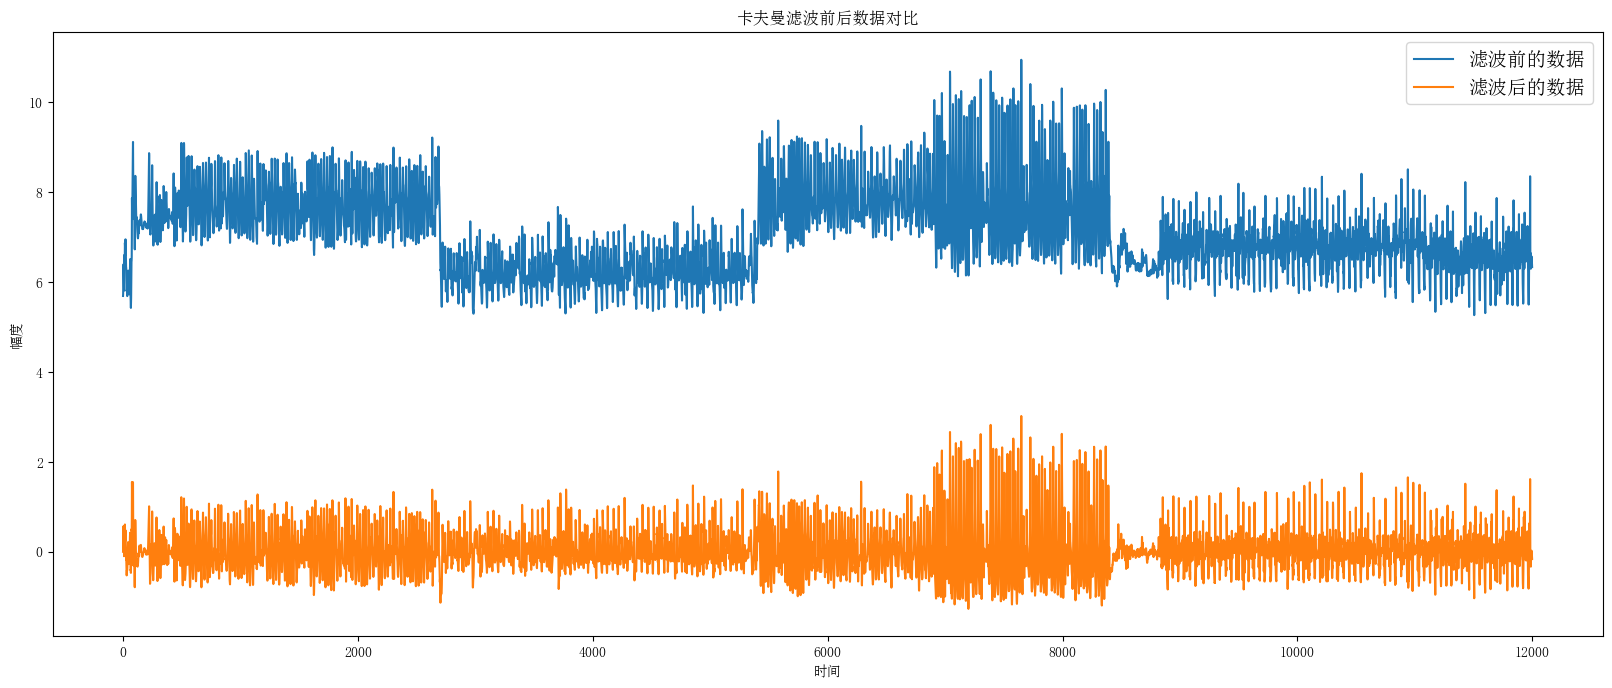

In [153]:
plt.figure(figsize=(20,8),dpi=100)
plt.plot(Noise_out[0:12000,0],label='滤波前的数据')
plt.plot(result[0:12000,0],label='滤波后的数据')
plt.legend(loc='best',fontsize=14)
plt.xlabel("时间")
plt.ylabel("幅度")
plt.title("卡夫曼滤波前后数据对比")

In [164]:
result.shape

(144899, 11)

In [160]:
list(range(0,100,10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [442]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
#X_train,X_test,Y_train,Y_test = train_test_split(df.values[:,0:3],df.values[:,-1],test_size=0.2)
X_train,X_test,Y_train,Y_test = train_test_split(result[:,0:3],df.values[:,-1],test_size=0.1)
clf = DecisionTreeClassifier(random_state=25
                           ,max_depth=20
              #,min_samples_leaf=20
              #,min_impurity_split=50
                            )
clf = clf.fit(X_train,Y_train)
score_ = clf.score(X_train,Y_train)
score_

0.9619581470604023

In [443]:
clf.score(X_test,Y_test)

0.8469289164941339

In [146]:
X_test=df_test.values[:,0:3]
Y_test=df_test.values[:,-1]
clf.score(X_test,Y_test)

0.18018757893429216

In [716]:
x_test=df_test.values[:,0:3]
y_test=df_test.values[:,-2]
clf.score(x_test,y_test)

0.3322038109303722

In [121]:
[*zip(df.columns,clf.feature_importances_)]

[('加速计x轴', 0.2920113871098733),
 ('加速计y轴', 0.323411985068825),
 ('加速计z轴', 0.3307028157476897),
 ('陀螺仪x轴', 0.02342398393808842),
 (' 陀螺仪y轴', 0.015977499958597603),
 ('陀螺仪z轴', 0.01447232817692585)]

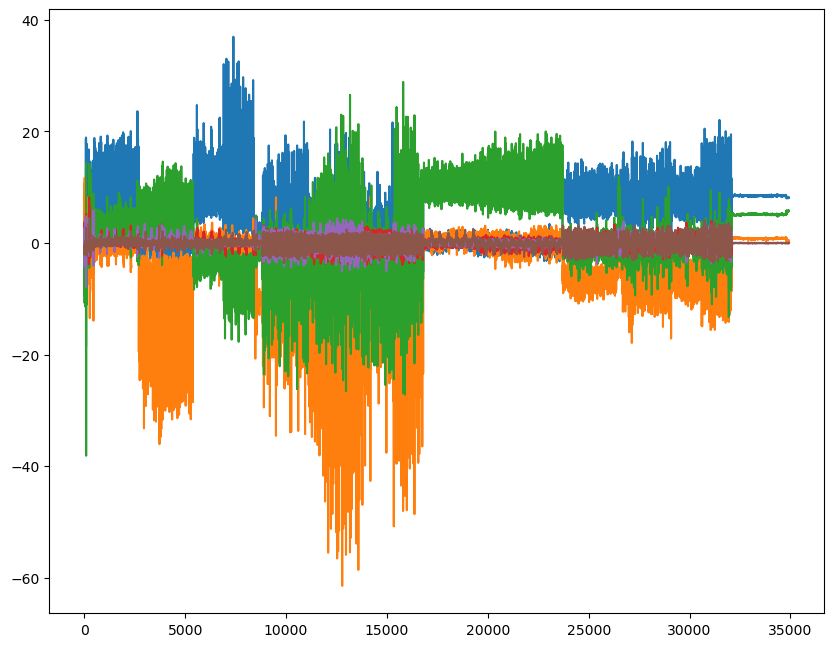

In [66]:
splot(X)

### 购建数据集

In [535]:
import os
import torch.utils.data as data
class Dateset(data.Dataset):
    def __init__(self,root_dir):
        self.filename=root_dir
        #self.transform=transform
        data=[]
        meta=[]
        x=[]
        y=[]
        for filename in os.listdir(root_dir):#展开成一个新的列表
            meta.append(filename)
        for item in meta[1:2]:
            with open(root_dir+item) as f:
                lines=f.readlines()
                for line in lines:
                    data1=line.split()
                    data.append(data1)
            #得到传感器的值和标签值
            data=np.array(data).astype(np.float32)
            #data=data.asarray()
            label=data[:,-2:].astype(np.int64)
            #label=label#.astype(np.int64)
            record=data[:,:-2].astype(np.float32)
            #record=record
            #if self.transform:
            #   record,label=transforms(record,label,lenght)
            x.extend(record)
            y.extend(label)
        self.data=np.array(x)
        #np.random.shuffle(self.data)
        self.label=np.array(y)
        #np.random.shuffle(self.label)
        self.num=self.label.shape[0]
    def __len__(self):
        return self.num
    def __getitem__(self,idx):
        data=torch.tensor(self.data[i,:],dtype=torch.float32)
        label=torch.tensor(self.label[i,:],dtype=torch.int64)
        return data,label
    
    
dataset=Dateset(root_dir="F:/机器学习数据集/data and code/data/")   

In [ ]:
#犯了一个错误，没有初始化x的情况下，就extend，结果发生了问题,成了str类型

In [ ]:
def transform(values):
    Acc_test=values
    Acc_test[:,0:3]=model(torch.tensor(Acc_test[:,0:3],dtype=torch.float)).detach().numpy()
    Acc_dn=Denosie(Acc_test[:,0:3])
    Accelerate_behind=Filter(Acc_dn)
    Acc_test[:,0:3]=Acc_dn-Accelerate_behind
    return Acc_test

In [455]:
dataset.__getitem__(1)

(tensor([ 1.2691e+04, -2.5077e+00,  7.1414e+00, -3.1944e+00,  9.6655e-01,
          9.3878e-01,  2.4413e-01,  1.0065e+03,  5.4240e+00,  0.0000e+00]),
 tensor([1, 1]))

In [457]:
dataloader = torch.utils.data.DataLoader(dataset,
                                            batch_size=4, 
                                            shuffle=True,
                                            )
feature,lable=next(iter(dataloader))
label

In [458]:
feature,lable=next(iter(dataloader))
label

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [338]:
for i_batch, sample_batched in enumerate(dataset_loader):
    print(i_batch)
    break

BrokenPipeError: [Errno 32] Broken pipe

###  搭建网络

In [610]:
#搭建网络
import torch
import torch.nn as nn
import torch.nn.functional as F

class Recognize(nn.Module):
    def __init__(self):
        super(Recognize,self).__init__()
        
        D_in,H1,H2,H3,H4,H5,D_out = 6,8,16,32,16,8,5
        
        self.linear1=nn.Linear(D_in,H2)
        self.linear2=nn.Linear(H2,H5)
        self.linear3=nn.Linear(H5,D_out)
        self.softmax= nn.Softmax()
        self.activate=F.sigmoid
    def forward(self,x):
        h=self.activate(self.linear1(x))
        h=self.activate(self.linear2(h))
        h=self.activate(self.linear3(h))
        """h=self.linear1(x)
        h=self.linear2(h)
        h=self.linear3(h)"""
        
        h=self.softmax(h)
        return h
    def init_weight():
        for params in net.parameters():
             init.normal_(params, mean=0, std=0.01)

In [ ]:
#nn里面的softmax是类，要想用，先要实例化

###  网络训练过程

In [617]:
import torch.optim as optim

def train():
    
    epoch_num = 20
    root_dir="F:/机器学习数据集/data and code/data/"
    transet=Dateset(root_dir)
    dataset_loader = torch.utils.data.DataLoader(dataset,
                                            batch_size=140000, 
                                            shuffle=True,
                                            )
    model = Recognize()
    loss_fn =  F.cross_entropy
    #optimizer = optim.SGD(model.parameters(),lr=0.1,momentum=0.8)
    optimizer = optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-02, weight_decay=0, amsgrad=False)
    for epoch in range(epoch_num):
        
        for iters,data in enumerate(dataset_loader):
            #lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=,gamma=0.9)
            feature,label = data
            y_predict = model(feature[:,1:7])
            #loss = torch.FloatTensor(loss_fn(y_predict,label))
            label=torch.tensor(label,dtype=torch.int64)
            #print(label.shape)
            #target=torch.nn.functional.one_hot(label[:,-1].T,num_classes=5)
            loss = loss_fn(y_predict,label[:,-1]-1)
            if iters % 5 == 4: # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                (epoch + 1, iters + 1, loss ))
                running_loss = 0.0
            #model.zero_grad()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    torch.save(model.state_dict(), "./8.5_model.pt")      
    print('Finished Training')

In [618]:
train()

E:\anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
E:\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
E:\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


KeyboardInterrupt: 

In [600]:
model1 = Recognize()
model1.load_state_dict(torch.load("./8.5_model.pt"))
y_predict = model1(torch.tensor(df.values[2250:2300,1:7],dtype=torch.float32))
#F.cross_entropy(y_predict,torch.tensor(df.values[2250:2300,-1]-1,dtype=torch.int64))
y_predict
#df.values[75250:76000,-1]

E:\anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
E:\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],
        [0.1951, 0.1190, 0.1846, 0.2087, 0.2926],


In [565]:
loss_fn =  F.cross_entropy
cross_entropy(y_predict,torch.tensor((df.values[2250:2300,-1]-1).astype(np.int64)))

tensor([[43.4203],
        [43.4162],
        [43.4150],
        [43.7497],
        [43.7061],
        [43.7178],
        [43.6141],
        [43.5522],
        [43.5481],
        [43.6106],
        [43.6715],
        [43.7414],
        [43.7649],
        [43.7909],
        [43.7863],
        [43.7626],
        [43.7496],
        [43.7426],
        [43.7419],
        [43.7498],
        [43.7464],
        [43.7046],
        [43.7028],
        [43.6902],
        [43.7296],
        [43.7426],
        [43.7493],
        [43.6933],
        [43.6215],
        [43.5677],
        [43.5839],
        [43.7377],
        [43.7703],
        [43.7900],
        [43.7362],
        [43.7487],
        [43.7960],
        [43.8364],
        [43.8664],
        [43.8554],
        [43.8263],
        [43.8348],
        [43.8449],
        [43.8546],
        [43.8287],
        [43.8149],
        [43.8003],
        [43.7779],
        [43.7712],
        [43.7909]], grad_fn=<NegBackward>)

In [570]:
#df.values[2250:2300,-1][0]
np.max(df.values[:,-1])

5.0

In [478]:
# Example of target with class indices
input = torch.randn(3, 5, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)
loss = F.cross_entropy(input, target)
loss

tensor(2.0377, grad_fn=<NllLossBackward>)

In [483]:
torch.randint(5, (3,), dtype=torch.int64)

tensor([0, 0, 4])

In [481]:
modeltest=Recognize()
modeltest.load_state_dict(torch.load("./8.5_model.pt"))
modeltest(feature[:10,1:7])

tensor([[0.2226, 0.2839],
        [0.2226, 0.2839],
        [0.2226, 0.2839],
        [0.2226, 0.2839]], grad_fn=<ReluBackward0>)

In [443]:
for iters,data in enumerate(dataset_loader):
    feature,label = data
    break

In [383]:
modeltest = Recognize()
modeltest(feature[0,1:7])

tensor([-0.1729,  0.1774], grad_fn=<AddBackward0>)

In [574]:
target=torch.tensor([1.2, 1, 1, 1])
label1=torch.tensor(df.values[:,-1],dtype=torch.int64)
targets_to_one_hot = torch.nn.functional.one_hot(label1)

In [575]:
targets_to_one_hot

tensor([[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        ...,
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1]])

In [62]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat.gather(1, y.view(-1, 1)))

In [529]:
y_hat=torch.tensor([[1.0,0.0,0.0,0.0],[0.5]*4])
y=torch.tensor([0,2])
cross_entropy(y_hat, y)

tensor([[-0.0000],
        [0.6931]])

In [477]:
y_hat.gather(1, y.view(-1, 1))

tensor([[0.2000],
        [0.5000]])

In [436]:
m = nn.Softmax(dim=0)
m(label)

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500],
        [0.2500, 0.2500],
        [0.2500, 0.2500]])

In [473]:
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = torch.LongTensor([0, 2])
y_hat.gather(1, y.view(-1, 1))

tensor([[0.1000],
        [0.5000]])

### 数据去噪处理

In [ ]:
import torch.utils.data as data

def transforms(data,label,lengh):
    for i in range(0, np.size(label, 0) - lengh, int(lengh / 50))
        sublistx=data[i:i+lengh,:]
        sublisty=data[i:i+lengh,:]
        x.append(sublistx)
        y.append(sublisty)
    x=np.array(x)
    y=np.array(y)
    #求特征值，均值，方差，这些
    feature=[]
    '''
    mean=np.mean(x,axis=1)
    mid = np.median(x, axis=1)
    variance = np.var(x, axis=1)
    minimum = np.min(x, axis=1)
    maximum = np.max(x, axis=1)
    feature = np.concatenate((mean, mid, variance, minium, maximum), axis=1)
    '''
    for item in x:
        #均值
        mean=np.mean(item,axis=0)
        
        #中位数
        mid = np.median(item, axis=0)
        
        # 方差
        variance = np.var(item, axis=0)
        
        # 最小值
        minimum = np.min(item, axis=0)
        
        # 最大值
        maximum = np.max(item, axis=0)
        
        f=mean+mid+varince+minimum+maximum
        feature.append(f)
    feature=np.array(feature)
    for item in y:
        counts1 = np.bincount(item[:, 0])
        counts2 = np.bincount(item[:, 1])
        y1=np.argmax(counts1)
        y2=np.argmax(counts2)
        y=[y1,y2]
        label.append(y)
        label=np.array(label)
    return feature,label
class Dateset(data.Dataset):
    def __init__(self,root_dir,transform):
        self.filename=root_dir
        self.transform=transform
        data=[]
        batchset=['batch1','batch2','batch3','batch4','batc5','batch6','batch7','batch8']
        for batch in batchset:
            with open(filename+'//'+batch) as f:。
                lines=f.readlines()
                for line in lines:
                    data1=line.split()
                    data=data.append(data1)
            #得到传感器的值和标签值
            data=np.array(data)
            label=data[:,-2:]
            record=data[:,:-2]
            if self.transform:
                record,label=transforms(record,label,lenght)
            x.append(record)
            y.append(label)
            self.data=np.array(x)
            self.label=np.array(y)
        self.num=np.size(y, 0)
    def len():
        return self.num
    def getitem(idx):
        

In [ ]:
#主函数
import numpy as np

def main():
    #设置需要的超参数
    utils.prepare_parpser()
    train_set=utils.Dataset(
    config[root_dir],
    transform=True
    )
    model=model.Classmode
    for stage in range(len(config('stage'))):
        for j in range(iternation[stage]):

In [ ]:
import xxx
def prepare_parpser:
    parser = ArgumentParser(description=usage)
        parser.add_argument(
            '--lr', type=float, default=0.0001,
            help='learning_rate')
        parser.add_argument(
            '--iteration', type=int, default=10000,
            help='learning_rate')
        
        
    return parser

In [496]:
import os
import torch.utils.data as data
import torch
import torch.nn as nn
import torch.nn.functional as F
class Dateset(data.Dataset):
    def __init__(self,root_dir):
        self.filename=root_dir
        #self.transform=transform
        data=[]
        meta=[]
        x=[]
        y=[]
        for filename in os.listdir(root_dir):#展开成一个新的列表
            meta.append(filename)
        for item in meta[1:2]:
            temp=[]
            with open(root_dir+item) as f:
                lines=f.readlines()
                for line in lines:
                    data1=line.split()
                    temp.append(data1)
            data.append(np.array(temp).astype(np.float32))
            #得到传感器的值和标签值
        for item in data:
            tempx,tempy=transform(item)
            #print(tempx.shape)
            x.extend(tempx)
            y.extend(tempy)
        self.data=np.array(x)#.squeeze()
        self.label=np.array(y)#.squeeze()
        
        print(self.data.shape)
        self.num=self.data.shape[0]
    def __len__(self):
        return self.num
    def __getitem__(self,idx):
        scaler=F.normalize
        data=torch.tensor(self.data[idx,:,:],dtype=torch.float32)
        data=scaler(data,dim=2)
        label=torch.tensor(self.label[idx],dtype=torch.int64)
        return data,label
    
    
dataset=Dateset(root_dir="F:/机器学习数据集/data and code/data/")   

(4290, 1, 60, 6)


In [497]:
dataloader = torch.utils.data.DataLoader(dataset,
                                            batch_size=1000, 
                                            shuffle=True,
                                            )
feature,lable=next(iter(dataloader))
feature.shape

torch.Size([1000, 1, 60, 6])

In [166]:
meta

['何海兵新.txt',
 '崔增平新.txt',
 '朱姝琪新.txt',
 '朱然新.txt',
 '朱芳尧新.txt',
 '李铭东新.txt',
 '秦一博新.txt',
 '苏永才新.txt',
 '赵岚新.txt',
 '马万明新.txt']

In [97]:
#np.max(feature,1)np.amax(a, axis=1)
feature,lable=next(iter(dataloader))
feature.shape
#scaler=torch.nn.functional.normalize
#xend=scaler(feature,dim=2)#.shape

torch.Size([1000, 1, 120, 6])

In [523]:
xend

tensor([[[[ 0.0664, -0.1191, -0.0329, -0.1028, -0.0083, -0.1409],
          [-0.0181, -0.1170, -0.0555, -0.1373, -0.0556, -0.1706],
          [-0.1201, -0.1136, -0.0417, -0.1582, -0.0513, -0.1725],
          ...,
          [-0.0445, -0.0584,  0.0334, -0.0695, -0.2372, -0.1231],
          [-0.0650, -0.0479,  0.0243, -0.0520, -0.2225, -0.0993],
          [-0.0792, -0.0397,  0.0216, -0.0287, -0.1817, -0.0646]]],


        [[[ 0.0938, -0.0908, -0.0919,  0.1275, -0.1235,  0.0402],
          [ 0.0970, -0.0906, -0.0918,  0.1242, -0.1424,  0.0188],
          [ 0.1009, -0.0909, -0.0916,  0.0926, -0.1375, -0.0069],
          ...,
          [ 0.0832, -0.0903, -0.0904,  0.0072,  0.1426,  0.0759],
          [ 0.0814, -0.0908, -0.0902,  0.0437,  0.1048,  0.0272],
          [ 0.0776, -0.0912, -0.0900,  0.0563,  0.0350, -0.0178]]],


        [[[ 0.0893,  0.1060,  0.0950, -0.0569, -0.1102,  0.1294],
          [ 0.0892,  0.1062,  0.0960, -0.0487, -0.1178,  0.1220],
          [ 0.0893,  0.1090,  0.0954, 

### 网络搭建

In [499]:
#搭建网络
import torch
import torch.nn as nn
import torch.nn.functional as F

class Recognize(nn.Module):
    def __init__(self):
        super(Recognize,self).__init__()
        
        D_in,H1,H2,H3,H4,H5,D_out = 6,8,16,32,16,8,5
        
        self.conv1=nn.Conv2d(1, 64, (6,3), stride=(1,1),padding=(0, 0))
        self.conv2=nn.Conv1d(64,64,6)
        self.pool=pool=nn.MaxPool1d(2,2)
        self.fc1=nn.Linear(2*64*26,120)
        self.fc2=nn.Linear(120,5)
        self.softmax= nn.Softmax()
        self.activate=F.relu
    def forward(self,x):
        x1=x[:,:,:,0:3]
        x2=x[:,:,:,3:6]
        x1 = self.pool(F.relu(self.conv1(x1).squeeze()))
        x1 = self.pool(F.relu(self.conv2(x1)))
        x1 = x1.view(-1, 1*64*26)
        x2 = self.pool(F.relu(self.conv1(x2).squeeze()))
        x2 = self.pool(F.relu(self.conv2(x2)))
        x2 = x1.view(-1, 1*64*26)
        h = torch.cat((x1, x2), 1)
        h = F.relu(self.fc1(h))
        h = F.relu(self.fc2(h))
        h=self.softmax(h)
        return h
    def init_weight():
        for params in net.parameters():
             init.normal_(params, mean=0, std=0.01)

In [476]:
#搭建网络
import torch
import torch.nn as nn
import torch.nn.functional as F

class Recognize(nn.Module):
    def __init__(self):
        super(Recognize,self).__init__()
        
        D_in,H1,H2,H3,H4,H5,D_out = 6,8,16,32,16,8,26
        channel1 = 48
        channel2 = 32
        self.conv1=nn.Conv2d(1, channel1, (9,3), stride=(1,1),padding=(0, 1))
        self.conv2=nn.Conv2d(channel1,channel2,(9,3), stride=(1,1),padding=(0, 1))
        self.pool=nn.MaxPool2d((3, 1), stride=(2, 1),padding=(0, 0))
        self.fc1=nn.Linear(2*channel2*8*3,120)
        self.fc2=nn.Linear(120,5)
        self.softmax= nn.Softmax()
        self.activate=F.relu
    def forward(self,x):
        channel = 32
        x1=x[:,:,:,0:3]
        x2=x[:,:,:,3:6]
        x1 = self.pool(F.relu(self.conv1(x1).squeeze()))
        x1 = self.pool(F.relu(self.conv2(x1)))
        x1 = x1.view(-1, channel*8*3)
        x2 = self.pool(F.relu(self.conv1(x2).squeeze()))
        x2 = self.pool(F.relu(self.conv2(x2)))
        x2 = x1.view(-1, channel*8*3)
        h = torch.cat((x1, x2), 1)
        h = F.relu(self.fc1(h))
        h = F.relu(self.fc2(h))
        #h=self.softmax(h)
        return h
    def init_weight():
        for params in net.parameters():
             init.normal_(params, mean=0, std=0.01)

TypeError: sigmoid(): argument 'input' (position 1) must be Tensor, not int

In [479]:
import torch.optim as optim

def train(dataset):
    
    epoch_num = 200
    root_dir="F:/机器学习数据集/data and code/data/"
    #transet=Dateset(root_dir)
    dataset_loader = torch.utils.data.DataLoader(dataset,
                                            batch_size=2681, 
                                            shuffle=True,
                                            )
    model = Recognize()
    error=[]
    #model.load_state_dict(torch.load("./8.5_model_new_250.pt"))
    loss_fn =  F.cross_entropy
    optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.8)#目前最优0.01
    #optimizer = optim.Adam(model.parameters(), lr=0.0008, betas=(0.9, 0.999), eps=1e-02, weight_decay=0, amsgrad=False)
    for epoch in range(epoch_num):
        
        for iters,data in enumerate(dataset_loader):
            #lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=,gamma=0.9)
            feature,label = data
            y_predict = model(feature)
            #loss = torch.FloatTensor(loss_fn(y_predict,label))
            label=torch.tensor(label,dtype=torch.int64)
            #print(iters)
            #target=torch.nn.functional.one_hot(label[:,-1].T,num_classes=5)
            loss = loss_fn(y_predict,label-1)
            #loss = cross_entropy(y_predict,label-1).mean()
            error.append(loss)
            
            if iters % 5 == 0: # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                (epoch + 1, iters + 1, loss ))
                running_loss = 0.0
            #model.zero_grad()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    torch.save(model.state_dict(), "./8.5_model_new_250.pt")
    return error
    print('Finished Training')

In [480]:
error=train(dataset)

E:\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[1,     1] loss: 1.614
[2,     1] loss: 1.612
[3,     1] loss: 1.610
[4,     1] loss: 1.608
[5,     1] loss: 1.605
[6,     1] loss: 1.602
[7,     1] loss: 1.600
[8,     1] loss: 1.598
[9,     1] loss: 1.595
[10,     1] loss: 1.592
[11,     1] loss: 1.590
[12,     1] loss: 1.588
[13,     1] loss: 1.583
[14,     1] loss: 1.581
[15,     1] loss: 1.572
[16,     1] loss: 1.559
[17,     1] loss: 1.547
[18,     1] loss: 1.531
[19,     1] loss: 1.509
[20,     1] loss: 1.483
[21,     1] loss: 1.452
[22,     1] loss: 1.415
[23,     1] loss: 1.372
[24,     1] loss: 1.310
[25,     1] loss: 1.269
[26,     1] loss: 1.209
[27,     1] loss: 1.183
[28,     1] loss: 1.167
[29,     1] loss: 1.141
[30,     1] loss: 1.133
[31,     1] loss: 1.128
[32,     1] loss: 1.121
[33,     1] loss: 1.109
[34,     1] loss: 1.098
[35,     1] loss: 1.105
[36,     1] loss: 1.079
[37,     1] loss: 1.074
[38,     1] loss: 1.064
[39,     1] loss: 1.067
[40,     1] loss: 1.042
[41,     1] loss: 1.038
[42,     1] loss: 1.011
[

400

In [486]:
error_all=[]
error_all.append(error)
len(error)

400

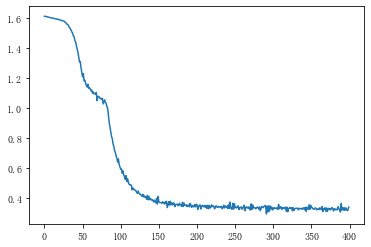

In [489]:
plt.plot(range(0,400),error_all[0],label='滤波前的数据')
plt.title("训练过程中损失的变化")
plt.xlabel("迭代次数")
plt.ylabel("损失")

In [501]:
loss_fn =  F.cross_entropy
model = Recognize()
model.load_state_dict(torch.load("./8.5_model.pt"))
predict=model(feature)
#predict=torch.tensor(np.array([[1,0,0,0,0],[0,0,0,0,1],[1,0,0,0,0],[0,1,0,0,0]]),dtype=torch.float32)
loss_fn(predict,lable-1).mean()

RuntimeError: shape '[-1, 1664]' is invalid for input of size 704000

In [202]:
predict

tensor([[3.6029e-05, 9.9990e-01, 2.0584e-05, 2.0584e-05, 2.0584e-05],
        [3.4592e-03, 9.9562e-01, 3.0526e-04, 3.0526e-04, 3.0526e-04],
        [7.0513e-07, 1.3114e-01, 8.6886e-01, 2.5666e-07, 1.7922e-07],
        [3.0500e-04, 1.9231e-07, 1.9231e-07, 1.9231e-07, 9.9969e-01],
        [9.9884e-01, 3.2196e-07, 1.2210e-05, 3.2196e-07, 1.1430e-03],
        [3.1250e-05, 9.9991e-01, 3.6582e-05, 1.3038e-05, 1.3038e-05],
        [1.9172e-15, 7.0540e-17, 6.2803e-09, 1.0000e+00, 5.0939e-17],
        [4.6747e-03, 2.8413e-08, 9.9533e-01, 4.2611e-08, 2.3243e-08],
        [2.8376e-04, 3.8738e-09, 3.8738e-09, 3.8738e-09, 9.9972e-01],
        [5.0450e-01, 1.5885e-02, 7.6332e-04, 6.8148e-04, 4.7817e-01]],
       grad_fn=<SoftmaxBackward>)

In [562]:
torch.save(model, "E:/User/Fimage/model")

PicklingError: Can't pickle <class '__main__.Recognize'>: it's not the same object as __main__.Recognize

In [204]:
lable

tensor([2, 4, 3, 5, 1, 2, 4, 3, 5, 1])

In [418]:
result1=np.argmax(predict.detach().numpy(), axis=1)+1  

In [419]:
label=lable.detach().numpy()
label.shape

(1000,)

In [203]:
predict.argmax(dim=1)+1

tensor([2, 2, 3, 5, 1, 2, 4, 3, 5, 1])

In [92]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1)+1 == y).float().mean().item()
score=accuracy(predict,lable)
#predict.argmax(dim=1)+1== lable
score

0.5289999842643738

In [420]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
np.array(precision_recall_fscore_support(result1, label)) 
accuracy_score(result1, label)

E:\anaconda\envs\pytorch\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.138

In [495]:
def transform(X):
    #数据去噪
    X_sample=X[X[:,-2]==2]
    X_data=Denosie(X_sample[:,1:7])
    X_label=[int(x) for x in X_sample[:,-1]]
    #数据加窗
    step=10
    lenght=60
    X_window=[]
    label=[]
    for i in range(0,(X_data.shape[0]-lenght)//step+1):
        X_window.append([X_data[i*step:i*step+lenght,:]])
        label_window=X_label[i*step:i*step+lenght]
        counts = np.bincount(label_window)
        #print(counts)
        label.append(np.argmax(counts))
    return np.array(X_window),np.array(label)

In [228]:
a,b=transform(data[0])

E:\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [254]:
a,b=transform(df.values)

Text(0.5, 1.0, '卡夫曼滤波前后数据对比')

E:\anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


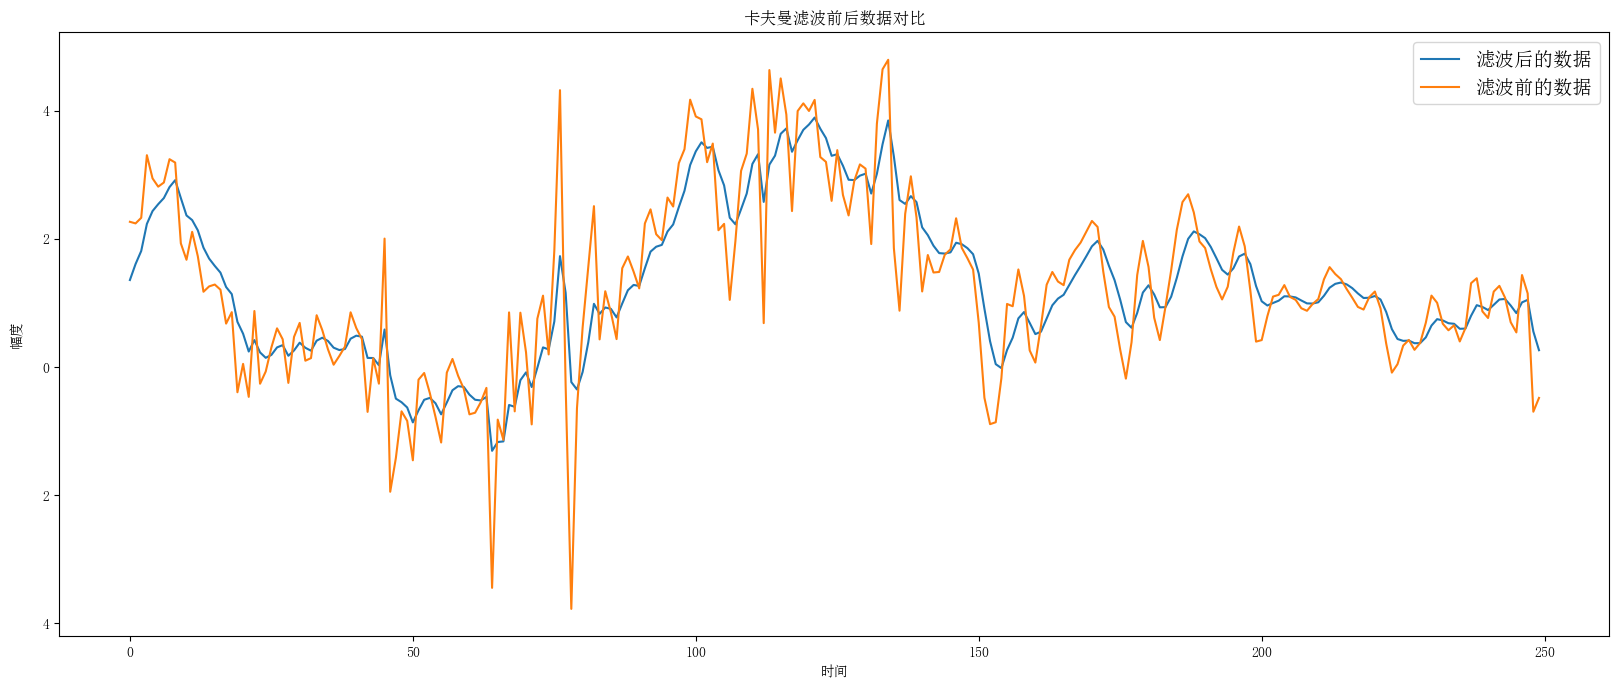

In [559]:
X_sample=df.values[df.values[:,-2]==2]
plt.figure(figsize=(20,8),dpi=100)
n=Denosie(X_sample[0:250,:])
plt.plot(n[:,0],label='滤波后的数据')
plt.plot(X_sample[0:250,0],label='滤波前的数据')
plt.legend(loc='best',fontsize=14)
plt.xlabel("时间")
plt.ylabel("幅度")
plt.title("卡夫曼滤波前后数据对比")

In [273]:
import torch.nn as nn
m = nn.MaxPool1d(3, stride=2)
input = torch.randn(20, 16, 50)
output = m(input)

In [299]:
m = nn.Conv2d(1, 30, (6,3), stride=(1,1),padding=(0, 0))
input = torch.randn(1, 1,120,3)
output = m(input)
print(output.shape)
output=torch.squeeze(output,dim=3)
pool=nn.MaxPool1d(2,2)
output=pool(output)
n=nn.Conv1d(30,30,6)
output=n(output)
output=pool(output)
output.shape

torch.Size([1, 30, 245, 3])


RuntimeError: Calculated padded input size per channel: (122 x 1). Kernel size: (6 x 6). Kernel size can't be greater than actual input size

In [324]:
test1=output.reshape(-1,30*26)
test2=test1.clone()

In [329]:
torch.cat((test2, test1), 1).shape

torch.Size([1, 1560])

In [327]:
output.shape

torch.Size([1, 30, 26])

In [439]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)
loss = F.cross_entropy(input, target)
#>>> loss.backward()
loss

tensor(1.7928, grad_fn=<NllLossBackward>)

In [475]:
m = nn.Conv2d(1, 30, (9,3), stride=(1,1),padding=(0, 1))
input = torch.randn(1, 1,60,3)
output = m(input)
print(output.shape)
#output=torch.squeeze(output,dim=3)
pool=nn.MaxPool2d((3, 1), stride=(2, 1),padding=(0, 0))
output=pool(output)
print(output.shape)
n=nn.Conv2d(30,30,(9,3), stride=(1,1),padding=(0, 1))
output=n(output)
output=pool(output)
output.shape

torch.Size([1, 30, 52, 3])
torch.Size([1, 30, 25, 3])


torch.Size([1, 30, 8, 3])

In [316]:
output.reshape(-1,30*25*3)

tensor([[-0.3353, -0.2259, -0.1925,  ...,  0.4736,  0.2986,  0.3817]],
       grad_fn=<ViewBackward>)